# Multiple linear regression

In [46]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
import time
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [47]:
#Get data from csv file
data = pd.read_csv("MultipleRegression/kc_house_data.csv") 
# Preview the first 5 lines of the loaded data 
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [48]:
#Explore data
print ("Rows     : " , data.shape[0])
print ("Columns  : " , data.shape[1])
print ("\nFeatures : \n", data.columns.tolist())
print ("\nMissing values :  ", data.isnull().sum().values.sum())
print ("\nUnique values :  \n", data.nunique())

Rows     :  21613
Columns  :  21

Features : 
 ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

Missing values :   0

Unique values :  
 id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [50]:
#delete unecesary id and date columns
data = data.drop(['id', 'date'], axis=1)

In [51]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Plot features

C:\Users\Erick\miniconda3\envs\pytorch_examples\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Erick\miniconda3\envs\pytorch_examples\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Erick\miniconda3\envs\pytorch_examples\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Erick\miniconda3\envs\pytorch_examples\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Erick\miniconda3\envs\pytorch_examples\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\

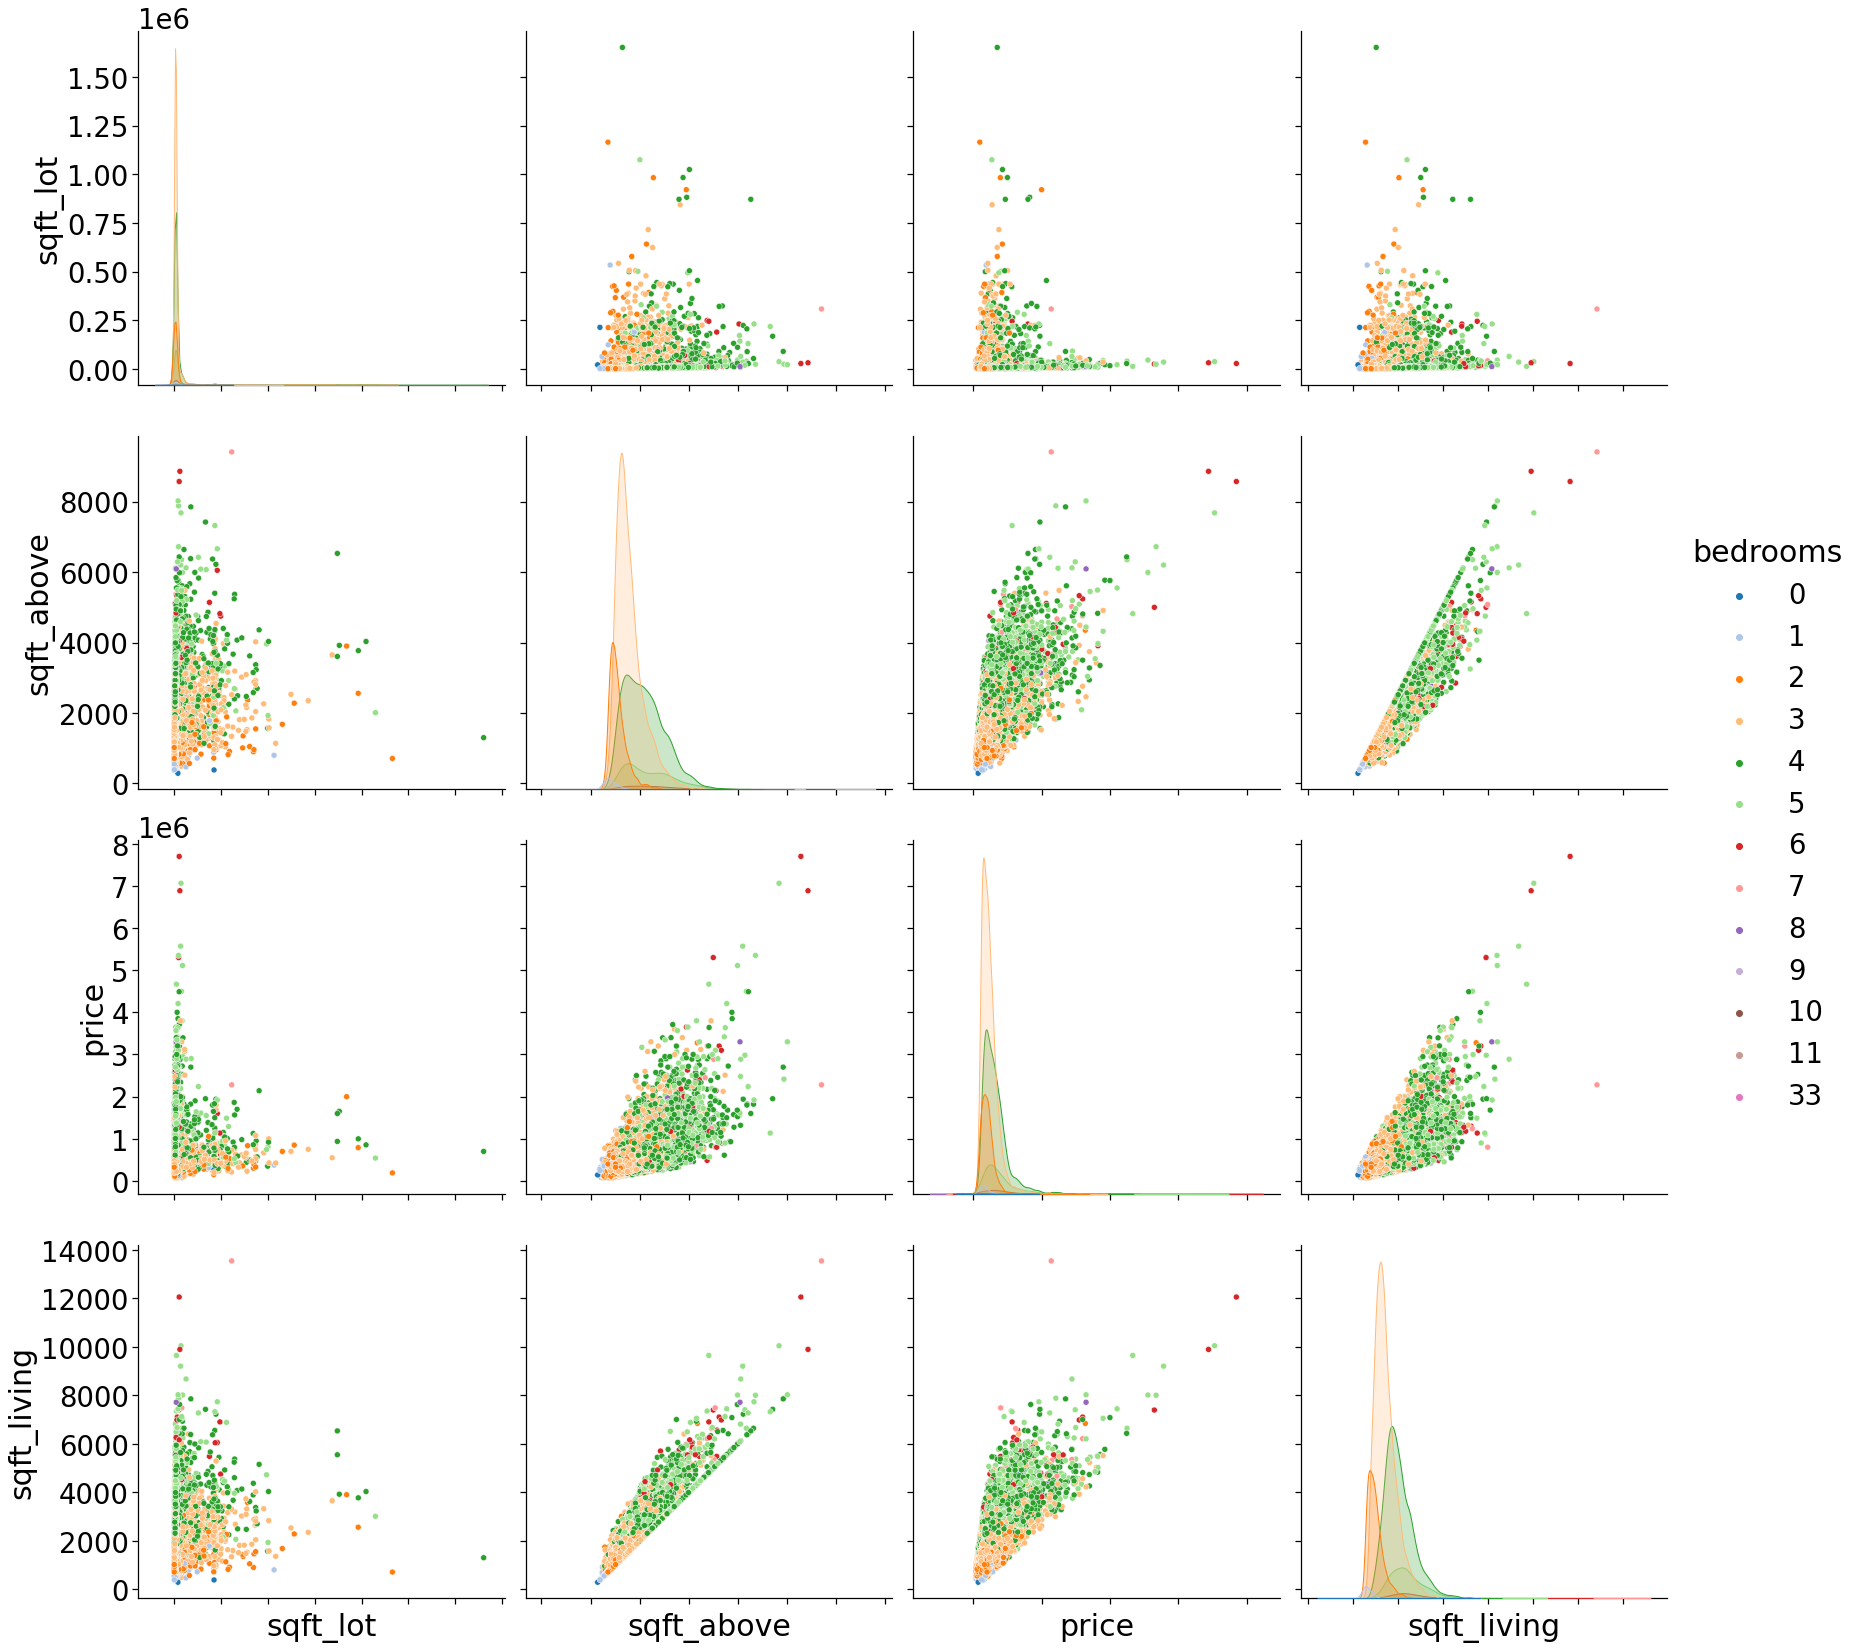

In [52]:
with sns.plotting_context("notebook", font_scale=2.5):
    g = sns.pairplot(data[['sqft_lot', 'sqft_above', 'price', 'sqft_living', 'bedrooms']], 
                 hue='bedrooms', palette='tab20', size=6)
g.set(xticklabels=[]);

<AxesSubplot:title={'center':'Pearson Correlation of features'}>

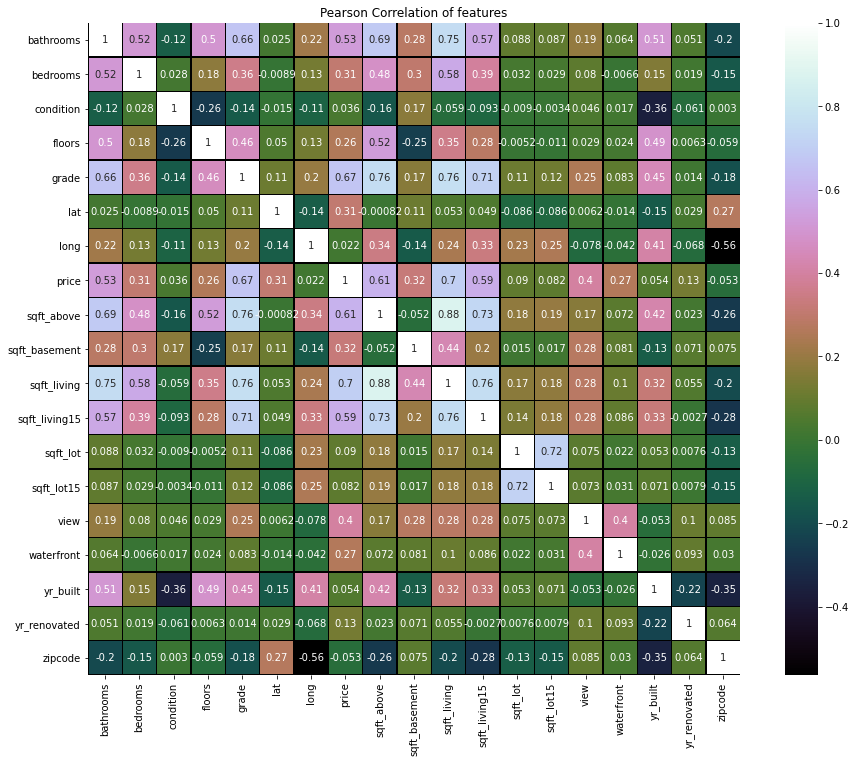

In [53]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in data.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = data.columns.difference(str_list) 
# Create Dataframe containing only numerical features
house_num = data[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

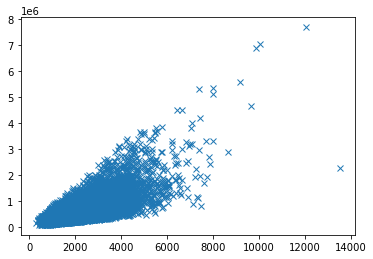

In [54]:
#data['sqft_lot']
plt.plot(data['sqft_living'], data['price'], 'x');

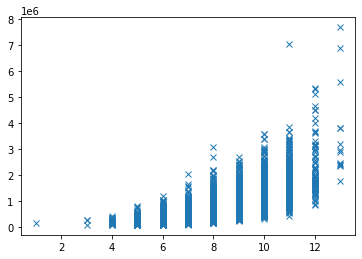

In [55]:
plt.plot(data['grade'], data['price'], 'x');

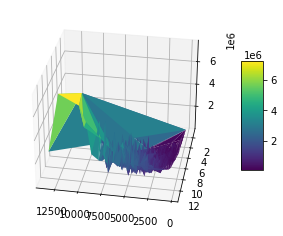

In [56]:

fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(data['sqft_living'], data['grade'], data['price'], cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar( surf, shrink=0.5, aspect=5)
ax.view_init(30, 100)
plt.show()

## Linear regression with sklearn using sqft_living and grade

Let's try to train a model with sklearn, using sqft_living and grade

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linr = LinearRegression()
#X_train.reshape(-1,1), y_trbain.reshape(-1,1)
linr.fit(data[['sqft_living', 'grade']], data['price'].to_numpy().reshape(-1, 1))

predictions_test = linr.predict(data[['sqft_living', 'grade']])
loss = mean_squared_error(data['price'].to_numpy().reshape(-1, 1), predictions_test)
print(f'This is the model loss: {loss}')

This is the model loss: 62737973366.66587


In [58]:
#print coefficient values
slbeta0 = linr.intercept_
slbeta1 = linr.coef_[0][0]
slbeta2 = linr.coef_[0][1]

print(f'b0: {slbeta0}, b1: {slbeta1}, b2: {slbeta2}')

b0: [-598108.98617144], b1: 184.42020584043465, b2: 98554.79813850214


Let's see the model linear prediction for sqft_living, using diferent grade values each time and see how it changes.

### Plot sqft_living vs price with grade 1

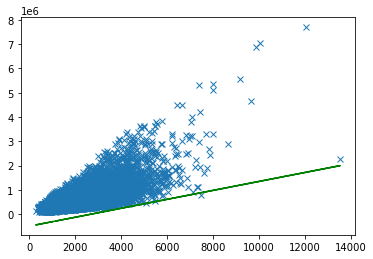

In [59]:
yplot = (data['sqft_living'] * slbeta1) + (1 * slbeta2) + slbeta0

plt.plot(data['sqft_living'], data['price'], 'x')
plt.plot(data['sqft_living'], yplot, 'g')
plt.show()

### Plot sqft_living vs price with grade 4

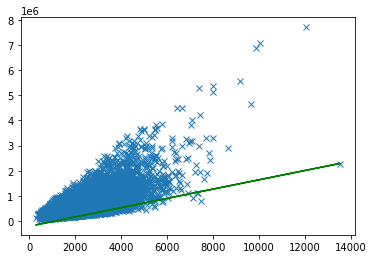

In [60]:
yplot = (data['sqft_living'] * slbeta1) + (4 * slbeta2) + slbeta0

plt.plot(data['sqft_living'], data['price'], 'x')
plt.plot(data['sqft_living'], yplot, 'g')
plt.show()

### Plot sqft_living vs price with grade 8

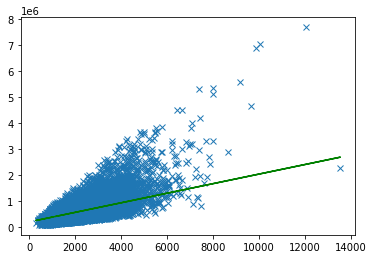

In [61]:
yplot = (data['sqft_living'] * slbeta1) + (8 * slbeta2) + slbeta0

plt.plot(data['sqft_living'], data['price'], 'x')
plt.plot(data['sqft_living'], yplot, 'g')
plt.show()

### Plot sqft_living vs price with grade 13

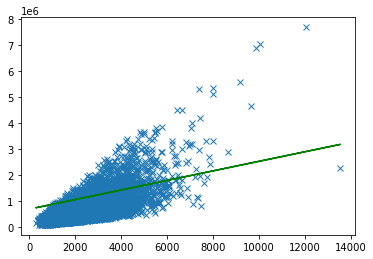

In [62]:
yplot = (data['sqft_living'] * slbeta1) + (13 * slbeta2) + slbeta0

plt.plot(data['sqft_living'], data['price'], 'x')
plt.plot(data['sqft_living'], yplot, 'g')
plt.show()

### Plot grade vs price with sqft_living = 5000

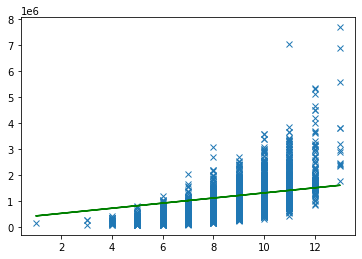

In [63]:
yplot = (5000 * slbeta1) + (data['grade'] * slbeta2) + slbeta0

plt.plot(data['grade'], data['price'], 'x')
plt.plot(data['grade'], yplot, 'g')
plt.show()

When ploting these 4 diagrams with diferent grade values, we can see how the line changes its position slightly.
I think I can use these two features with pytorch and try to get a similar result.

## Training model with pytorch

In [64]:
#convert from pandas dataframe to python array
data[['sqft_living', 'grade']].values

array([[1180,    7],
       [2570,    7],
       [ 770,    6],
       ...,
       [1020,    7],
       [1600,    8],
       [1020,    7]], dtype=int64)

In [65]:
#normalize data
sc = StandardScaler()
X = sc.fit_transform(data[['sqft_living', 'grade']].values)
X = torch.tensor(X, dtype=torch.float32)

Y = torch.tensor(data['price'].values, dtype=torch.float32)
Y = Y.view(Y.shape[0], 1)

In [66]:

n_samples, n_features = X.shape

#divide train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.65,test_size=0.35)

#Get data sample sizes
trainDataSize = X_train.size
testDataSize = y_test.size

In [104]:
n_epochs = 6
batch_size_train = 100
#batch_size_test = testDataSize
learning_rate = 0.001
momentum = 0.98
log_interval = 10


# create dataset
train_dataset = TensorDataset(X_train, y_train)

#Create loader using data
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size_train,
    shuffle=True)

# transform to torch tensor
#tensor_test_x = torch.Tensor(X_test.reshape(-1, 1))
#tensor_test_y = torch.Tensor(y_test.reshape(-1, 1))

# create your datset
#test_data = TensorDataset(tensor_test_x, tensor_test_y)

#Create loader using data
#test_loader = torch.utils.data.DataLoader(
#    test_data,
#    batch_size=batch_size_test,
#    shuffle=True)

In [105]:
#Network model
model = torch.nn.Linear(n_features, 1)

#Configure loss function
LossFunction = torch.nn.MSELoss(reduction='mean')

#Stochastic gradient decent
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)


In [106]:
train_losses = []
train_counter = []

for epoch in range(n_epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        #runs model with data and returns result in output
        output = model(data)

        #Calculate loss.
        loss = LossFunction(target, output)

        #Gradients are calculated
        loss.backward()

        #update gradients
        optimizer.step()

        #set parameters gradients to 0
        optimizer.zero_grad()

        #Display iteration statistics
        if batch_idx % 10 == 0:
            train_losses.append(loss.item())
            train_counter.append((batch_idx*batch_size_train) + ((epoch-1)*len(train_loader.dataset)))
            print(f'Train Epoch: {epoch}, batch: {batch_idx} \tLoss: {loss.item()}')

Train Epoch: 0, batch: 0 	Loss: 392195932160.0
Train Epoch: 0, batch: 10 	Loss: 298087088128.0
Train Epoch: 0, batch: 20 	Loss: 144845881344.0
Train Epoch: 0, batch: 30 	Loss: 83343671296.0
Train Epoch: 0, batch: 40 	Loss: 51424968704.0
Train Epoch: 0, batch: 50 	Loss: 143826747392.0
Train Epoch: 0, batch: 60 	Loss: 131094249472.0
Train Epoch: 0, batch: 70 	Loss: 137634070528.0
Train Epoch: 0, batch: 80 	Loss: 130727649280.0
Train Epoch: 0, batch: 90 	Loss: 72759345152.0
Train Epoch: 0, batch: 100 	Loss: 134051004416.0
Train Epoch: 0, batch: 110 	Loss: 102077325312.0
Train Epoch: 0, batch: 120 	Loss: 70610116608.0
Train Epoch: 0, batch: 130 	Loss: 66104422400.0
Train Epoch: 0, batch: 140 	Loss: 72312324096.0
Train Epoch: 1, batch: 0 	Loss: 170780229632.0
Train Epoch: 1, batch: 10 	Loss: 69496455168.0
Train Epoch: 1, batch: 20 	Loss: 52473827328.0
Train Epoch: 1, batch: 30 	Loss: 52737785856.0
Train Epoch: 1, batch: 40 	Loss: 50490564608.0
Train Epoch: 1, batch: 50 	Loss: 297464823808.0

In [107]:
wn, w0 = model.parameters()
X_plot = X_train[:, 0].numpy()

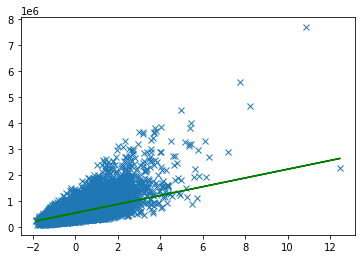

In [108]:
yplot = (X_plot * wn[0][0].item()) + (0 * wn[0][1].item()) + w0.item()

plt.plot(X_train[:, 0], y_train, 'x')
plt.plot(X_train[:, 0], yplot, 'g')
plt.show()

Text(0, 0.5, 'negative log likelihood loss')

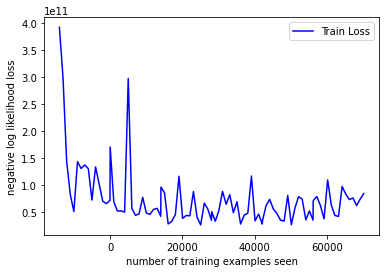

In [109]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
#plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')

# Resources

- Data was taken from: https://www.kaggle.com/harlfoxem/housesalesprediction/code?datasetId=128&sortBy=voteCount
- Selecting good features: http://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/

# ToDo

- Evaluar el modelo con el test dataset

# Notes

- NA